# 9.1.1 Seasonal Decomposition of Time Series (STL)
## Introduction to Time Series Decomposition

### Understanding Time Series Data

Time series data is a sequence of data points collected or recorded at successive points in time. Typically, the data is spaced at uniform intervals (e.g., daily, monthly, yearly). Examples of time series data include stock prices, temperature records, sales figures, and website traffic. Analyzing time series data helps identify patterns, trends, and seasonal variations, enabling more accurate forecasting and decision-making.

Time series analysis focuses on decomposing the data into its underlying components:
1. **Trend**: The long-term progression in the data, representing the overall direction (upward or downward).
2. **Seasonality**: Repeated patterns or cycles within the data that occur at regular intervals, often influenced by time of year or other periodic factors.
3. **Residuals**: The remaining noise or irregularities in the data after accounting for trend and seasonality.

### The STL Algorithm: Seasonal and Trend Decomposition Using Loess (locally estimated scatterplot smoothing) 

**STL (Seasonal and Trend decomposition using Loess)** is a powerful algorithm used to decompose a time series into its *three main components: trend, seasonality, and residuals*. Unlike some other decomposition methods, STL is highly flexible and robust, handling both additive and multiplicative models, irregular cycles, and non-linear trends.

The STL algorithm works as follows:
1. **Seasonal Extraction**: The seasonality is isolated by applying a low-pass filter to smooth out the data, capturing the repeating patterns over a specified period.
2. **Trend Extraction**: The trend is identified by applying another low-pass filter to the seasonally adjusted data (original data minus seasonality).
3. **Residual Calculation**: Finally, the residuals are calculated as the difference between the original data and the sum of the trend and seasonal components.

This process can be summarized mathematically as:

$$
Y_t = T_t + S_t + R_t
$$

Where:
- $Y_t$ is the observed value at time `t`
- $T_t$ is the trend component
- $S_t$ is the seasonal component
- $R_t$ is the residual component

The purpose of STL decomposition is to break down complex time series data into simpler, interpretable parts. By understanding these components separately, analysts can better identify underlying patterns, predict future values, and make informed decisions based on the trends and seasonality present in the data.


___
___
### Readings:
- [Time Series Decomposition](https://medium.com/@roshmitadey/time-series-decomposition-62cbf31ab65e)
- [Master the Power of Seasonal Decomposition of Time Series (STL)](https://medium.com/@tushar_aggarwal/master-the-power-of-seasonal-decomposition-of-time-series-stl-unveiling-the-essence-of-time-26c19a910314)
- [Seasonal-trend decomposition using Loess](https://readmedium.com/en/https:/medium.com/codex/seasonal-trend-decomposition-using-loess-58a682b84653)
- [STL decomposition simplified](https://sivashankarivaitheswaran.medium.com/stl-decomposition-simplified-f6dbe7072e2c)

___
___
### Using Synthetic data for building Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-01-01', freq='D')

In [3]:
# Create a series with a trend, seasonality, and noise
trend = np.linspace(50, 100, len(date_rng))
seasonality = 10 * np.sin(2 * np.pi * date_rng.dayofyear / 365)
noise = np.random.normal(scale=5, size=len(date_rng))
ts_data = trend + seasonality + noise

In [4]:
# Convert to Pandas Series with the correct date range
time_series = pd.Series(ts_data, index=date_rng)

In [5]:
# Perform STL decomposition
stl = STL(time_series, seasonal=13)
result = stl.fit()

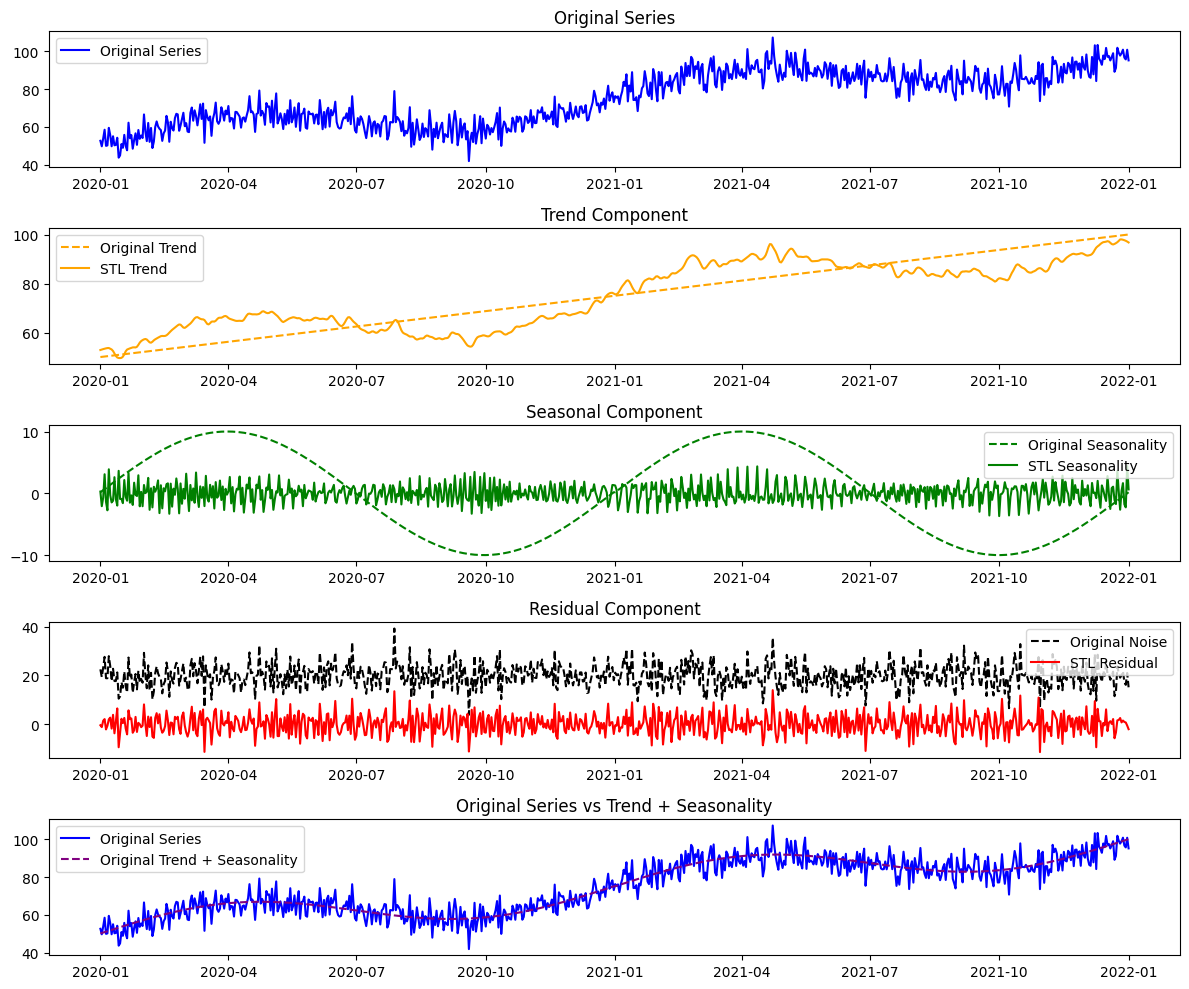

In [6]:
# Plotting the original series, components, and the original trend/seasonality/noise
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(time_series, label='Original Series', color='blue')
plt.title('Original Series')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(date_rng, trend, label='Original Trend', color='orange', linestyle='--')
plt.plot(result.trend, label='STL Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(date_rng, seasonality, label='Original Seasonality', color='green', linestyle='--')
plt.plot(result.seasonal, label='STL Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(date_rng, noise+20, label='Original Noise', color='k', linestyle='--') # adding 20 for visibility
plt.plot(result.resid, label='STL Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(time_series, label='Original Series', color='blue')
plt.plot(date_rng, trend + seasonality, label='Original Trend + Seasonality', color='purple', linestyle='--')
plt.title('Original Series vs Trend + Seasonality')
plt.legend()

plt.tight_layout()
plt.show()

___
___
### Using AirPassengers Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from statsmodels.tsa.seasonal import STL

In [8]:
# Load the AirPassengers dataset
data = get_rdataset('AirPassengers').data
data['Year'] = data['time'].astype(int)
data['Month'] = ((data['time'] - data['Year']) * 12 + 1).astype(int)
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [9]:
print(data.head(10))

          time  value  Year  Month       Date
0  1949.000000    112  1949      1 1949-01-01
1  1949.083333    118  1949      1 1949-01-01
2  1949.166667    132  1949      3 1949-03-01
3  1949.250000    129  1949      4 1949-04-01
4  1949.333333    121  1949      4 1949-04-01
5  1949.416667    135  1949      6 1949-06-01
6  1949.500000    148  1949      7 1949-07-01
7  1949.583333    148  1949      7 1949-07-01
8  1949.666667    136  1949      9 1949-09-01
9  1949.750000    119  1949     10 1949-10-01


In [10]:
# Prepare the time series
time_series = pd.Series(data['value'].values, index=data['Date'])

In [11]:
time_series.head(10)

Date
1949-01-01    112
1949-01-01    118
1949-03-01    132
1949-04-01    129
1949-04-01    121
1949-06-01    135
1949-07-01    148
1949-07-01    148
1949-09-01    136
1949-10-01    119
dtype: int64

In [12]:
# Perform STL decomposition
stl = STL(time_series, seasonal=13, period=12)
result = stl.fit()

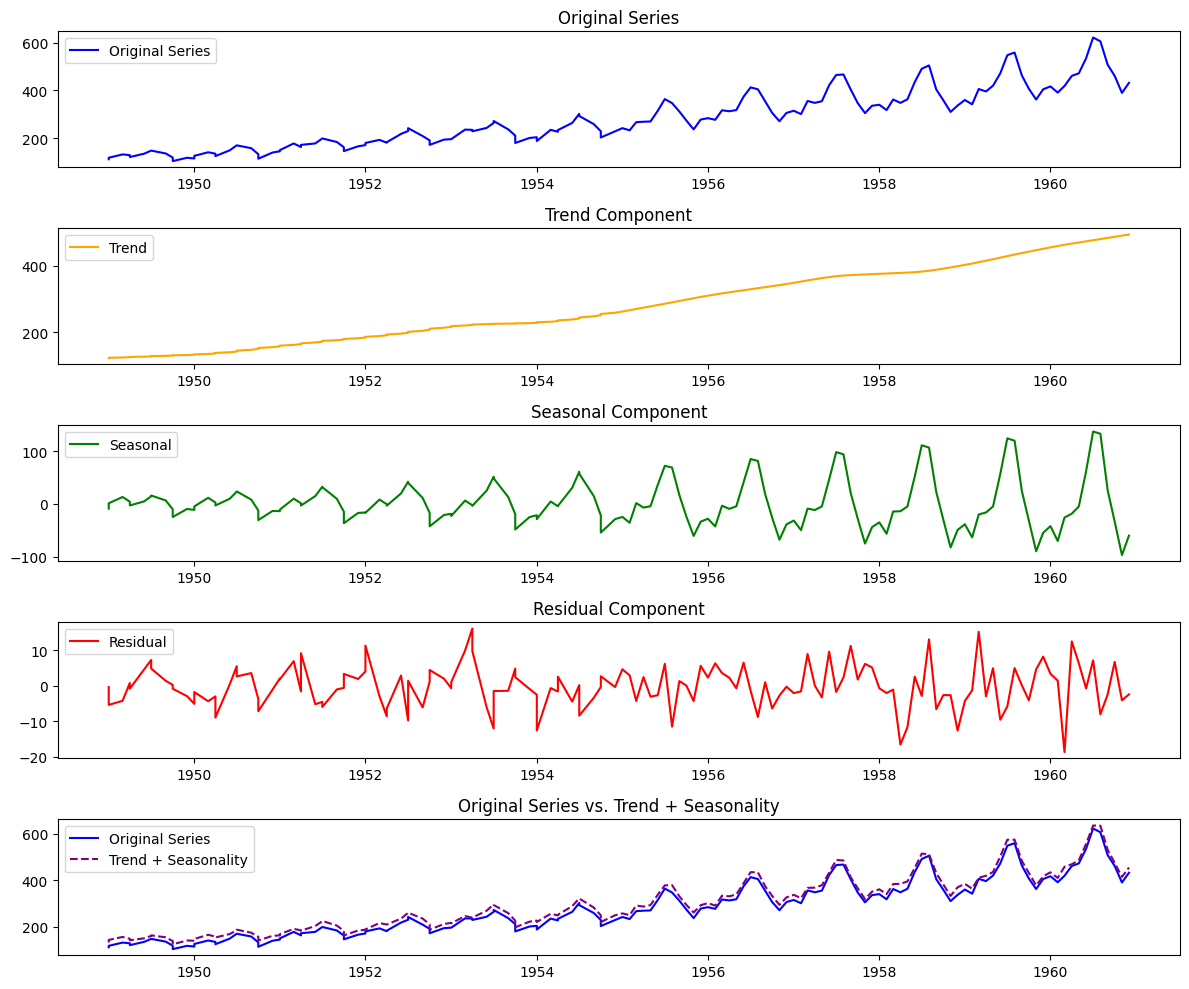

In [13]:
#  Plotting the original series and STL components
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(time_series, label='Original Series', color='blue')
plt.title('Original Series')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

# Adding the combined plot: Original vs. Trend + Seasonality
combined = result.trend + result.seasonal
plt.subplot(5, 1, 5)
plt.plot(time_series, label='Original Series', color='blue')
plt.plot(combined+20, label='Trend + Seasonality', color='purple', linestyle='--') #adding 20 for visibility
plt.title('Original Series vs. Trend + Seasonality')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

Seasonal and Trend decomposition using Loess (STL) provides a robust and flexible method for analyzing time series data. By breaking down the time series into its core components—trend, seasonality, and residuals—STL enables a clearer understanding of the underlying patterns and variations within the data.

The decomposition allows analysts to:
1. **Identify Trends**: Recognize long-term movements and shifts in the data, which are crucial for understanding the general direction and making strategic decisions.
2. **Understand Seasonality**: Detect recurring patterns and seasonal effects that influence the data at regular intervals, which is essential for forecasting and planning around predictable cycles.
3. **Analyze Residuals**: Examine the noise and irregular components that remain after accounting for trend and seasonality, helping to assess the model’s accuracy and identify potential outliers or anomalies.

By applying STL decomposition to time series data, one can achieve a more granular and accurate analysis, leading to better forecasting models and insights. This method is especially valuable in various fields such as finance, economics, and environmental studies, where understanding both the long-term trends and seasonal effects can significantly impact decision-making and strategic planning.
